In [12]:
import os, inspect, sys
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import datetime as dt
from dateutil.relativedelta import relativedelta

import plotly.plotly as py
import plotly.graph_objs as go


CURRENT_DIR = os.path.dirname(inspect.getabsfile(inspect.currentframe()))
ROOT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.insert(0, ROOT_DIR)

from reb.src.pyts import series_to_supervised

In [2]:
# monthly date range generator
def month_range(start_date, n_months):
    for m in range(n_months):
        yield start_date + relativedelta(months=+m)
        
# get all combinations of input iterable x
def get_combinations(x):
    rval = []
    for L in range(1, len(x)+1):
        for subset in itertools.combinations(x, L):
            rval.append(list(subset))
            
    return rval      

In [47]:
# read data
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "data_monthly_processed.csv")
df_original = pd.read_csv(ffname, parse_dates=["DATE"])
df_original.DATE = pd.to_datetime(df_original.DATE, format="%Y-%m")
df_original.head()

# Make a clean copy of data
df = df_original.copy() 

# Reindex data frame per the time stamps
df.set_index("DATE", inplace=True)


# Rescale data
all_values = df.values.astype("float32")
scaler = MinMaxScaler(feature_range=(0, 1))
all_values_scaled = scaler.fit_transform(all_values)


# USRECM: NBER based Recession Indicators for the United States from the Peak through the Trough
# index_target = NA

# GDPC1: Real Gross Domestic Product
# index_target = NA

# W875RX1: Real personal income excluding current transfer receipts
index_target = 13

# PAYEMS: All Employees: Total Nonfarm Payrolls
index_target = 0

# INDPRO: Industrial Production Index
index_target = 12

# CMRMTSPL: Real Manufacturing and Trade Industries Sales

# comb = vars_combinations[35]

variable_label = df.columns[index_target]
features = list(range(all_values_scaled.shape[1]))
del features[index_target]
feature_combinations = get_combinations(features)

[1, 3, 5]

Train Inputs Shape: (247, 24)
Valid Inputs Shape: (62, 24)
Train Inputs Shape: (247, 12), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 12), Valid Targets Shape: (62, 6)
Train Inputs Shape: (247, 6, 2), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 6, 2), Valid Targets Shape: (62, 6)
Train on 247 samples, validate on 62 samples
Epoch 1/30
247/247 [==============================] - 1s 4ms/step - loss: 0.3924 - val_loss: 0.7218
Epoch 2/30
247/247 [==============================] - 0s 886us/step - loss: 0.3433 - val_loss: 0.6396
Epoch 3/30
247/247 [==============================] - 0s 956us/step - loss: 0.2959 - val_loss: 0.5552
Epoch 4/30
247/247 [==============================] - 0s 951us/step - loss: 0.2461 - val_loss: 0.4619
Epoch 5/30
247/247 [==============================] - 0s 929us/step - loss: 0.1917 - val_loss: 0.3581
Epoch 6/30
247/247 [==============================] - 0s 954us/step - loss: 0.1344 - val_loss: 0.2491
Epoch 7/30
247/247 [======================

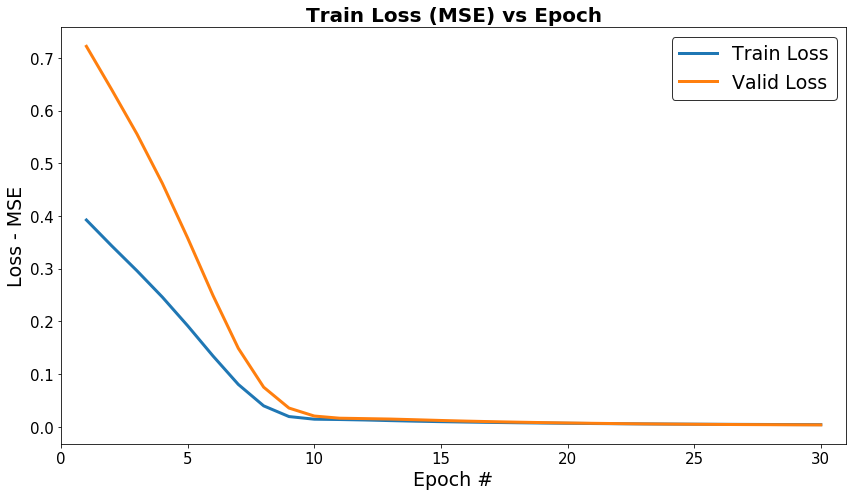

Train Inputs Shape: (247, 24)
Valid Inputs Shape: (62, 24)
Train Inputs Shape: (247, 12), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 12), Valid Targets Shape: (62, 6)
Train Inputs Shape: (247, 6, 2), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 6, 2), Valid Targets Shape: (62, 6)
Train on 247 samples, validate on 62 samples
Epoch 1/30
247/247 [==============================] - 1s 5ms/step - loss: 0.3582 - val_loss: 0.6810
Epoch 2/30
247/247 [==============================] - 0s 853us/step - loss: 0.2985 - val_loss: 0.5820
Epoch 3/30
247/247 [==============================] - 0s 1ms/step - loss: 0.2465 - val_loss: 0.4894
Epoch 4/30
247/247 [==============================] - 0s 1ms/step - loss: 0.1997 - val_loss: 0.4005
Epoch 5/30
247/247 [==============================] - 0s 989us/step - loss: 0.1577 - val_loss: 0.3156
Epoch 6/30
247/247 [==============================] - 0s 955us/step - loss: 0.1213 - val_loss: 0.2374
Epoch 7/30
247/247 [==========================

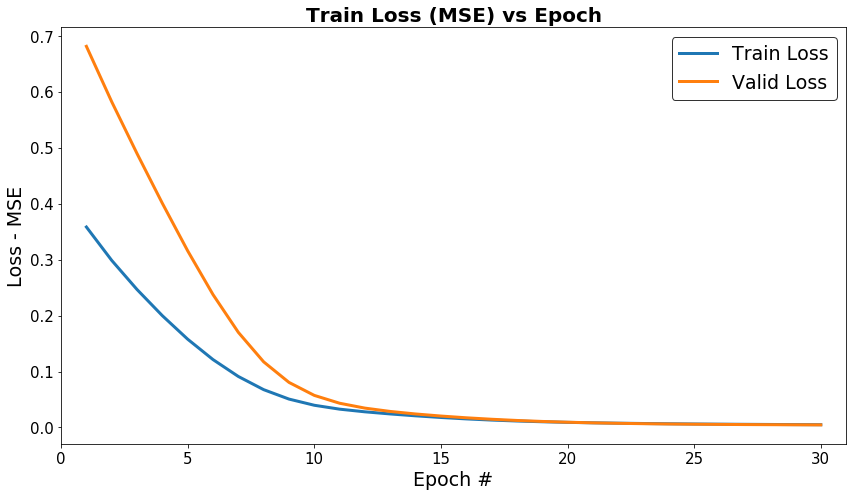

Train Inputs Shape: (247, 24)
Valid Inputs Shape: (62, 24)
Train Inputs Shape: (247, 12), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 12), Valid Targets Shape: (62, 6)
Train Inputs Shape: (247, 6, 2), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 6, 2), Valid Targets Shape: (62, 6)
Train on 247 samples, validate on 62 samples
Epoch 1/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4183 - val_loss: 0.7695
Epoch 2/30
247/247 [==============================] - 0s 908us/step - loss: 0.3608 - val_loss: 0.6754
Epoch 3/30
247/247 [==============================] - 0s 906us/step - loss: 0.3068 - val_loss: 0.5833
Epoch 4/30
247/247 [==============================] - 0s 956us/step - loss: 0.2535 - val_loss: 0.4884
Epoch 5/30
247/247 [==============================] - 0s 959us/step - loss: 0.1999 - val_loss: 0.3897
Epoch 6/30
247/247 [==============================] - 0s 1ms/step - loss: 0.1487 - val_loss: 0.2925
Epoch 7/30
247/247 [========================

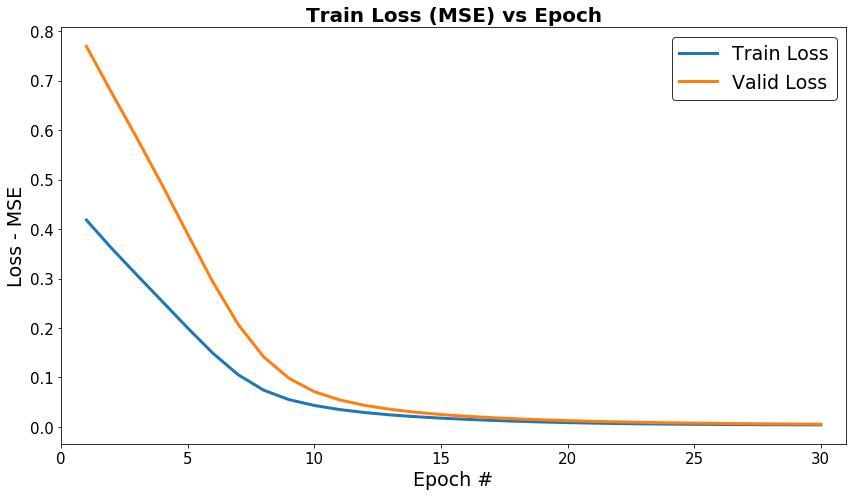

Train Inputs Shape: (247, 24)
Valid Inputs Shape: (62, 24)
Train Inputs Shape: (247, 12), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 12), Valid Targets Shape: (62, 6)
Train Inputs Shape: (247, 6, 2), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 6, 2), Valid Targets Shape: (62, 6)
Train on 247 samples, validate on 62 samples
Epoch 1/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4331 - val_loss: 0.7593
Epoch 2/30
247/247 [==============================] - 0s 922us/step - loss: 0.3337 - val_loss: 0.5981
Epoch 3/30
247/247 [==============================] - 0s 937us/step - loss: 0.2498 - val_loss: 0.4572
Epoch 4/30
247/247 [==============================] - 0s 1ms/step - loss: 0.1783 - val_loss: 0.3322
Epoch 5/30
247/247 [==============================] - 0s 967us/step - loss: 0.1175 - val_loss: 0.2228
Epoch 6/30
247/247 [==============================] - 0s 1ms/step - loss: 0.0694 - val_loss: 0.1339
Epoch 7/30
247/247 [==========================

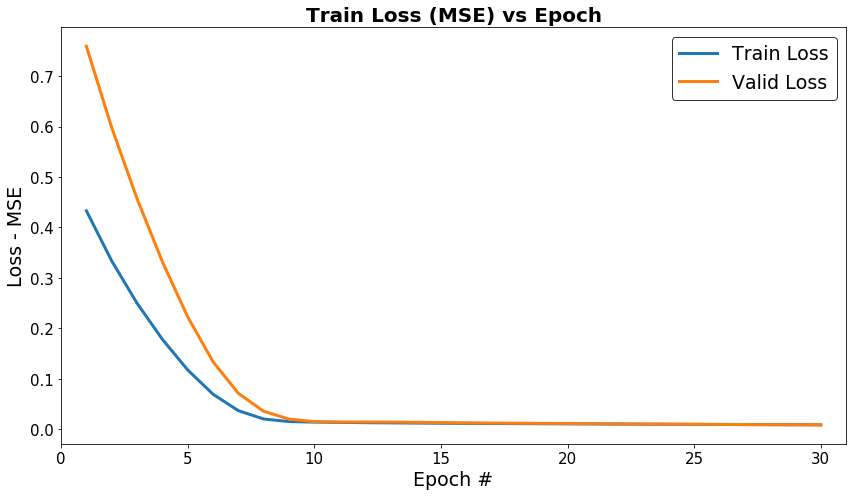

Train Inputs Shape: (247, 24)
Valid Inputs Shape: (62, 24)
Train Inputs Shape: (247, 12), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 12), Valid Targets Shape: (62, 6)
Train Inputs Shape: (247, 6, 2), Train Targets Shape: (247, 6)
Valid Inputs Shape: (62, 6, 2), Valid Targets Shape: (62, 6)
Train on 247 samples, validate on 62 samples
Epoch 1/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4525 - val_loss: 0.8243
Epoch 2/30
247/247 [==============================] - 0s 861us/step - loss: 0.3883 - val_loss: 0.7203
Epoch 3/30
247/247 [==============================] - 0s 938us/step - loss: 0.3273 - val_loss: 0.6155
Epoch 4/30
247/247 [==============================] - 0s 957us/step - loss: 0.2657 - val_loss: 0.5039
Epoch 5/30
247/247 [==============================] - 0s 1ms/step - loss: 0.2017 - val_loss: 0.3844
Epoch 6/30
247/247 [==============================] - 0s 1ms/step - loss: 0.1382 - val_loss: 0.2638
Epoch 7/30
247/247 [==========================

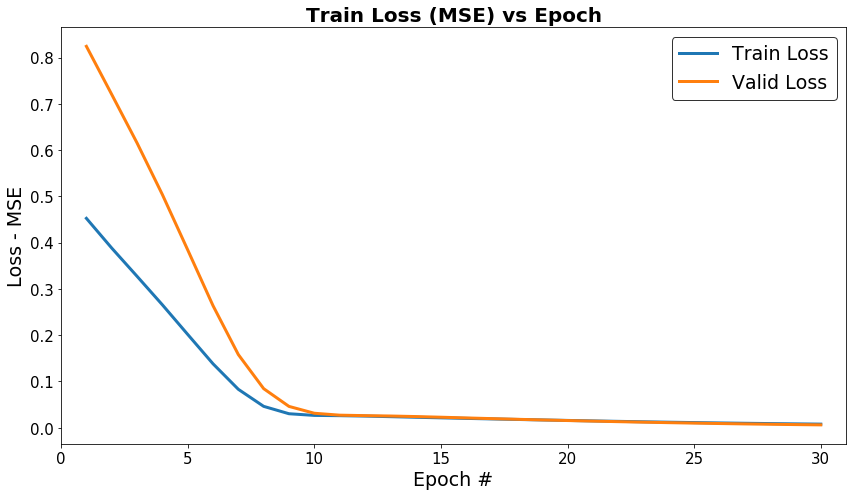

In [55]:
# for j in range(len(vars_combinations)):
for j in range(5):

    comb = feature_combinations[j]
    
    values_scaled = all_values_scaled[:, comb + [index_target]]
    n_variables = values_scaled.shape[1]
    # set model parameters
    n_lags = 6
    n_sequences = 6
    n_train = int(values.shape[0] * 0.8)
    n_units = 10

    # set train parameters
    optimizer = "adam"
    loss = "mse"
    n_epochs = 30
    sz_batch = 20
    verbose = 1

    df_reframed = series_to_supervised(values_scaled, n_lags, n_sequences)
    
    # [print(elem) for elem in df_reframed.columns]

    # create train/valid data
    # split into train and test sets
    values = df_reframed.values
    train_values, valid_values = values[:n_train, :], values[n_train:, :]
    print(f"Train Inputs Shape: {train_values.shape}")
    print(f"Valid Inputs Shape: {valid_values.shape}")
    
    # split into input and targets
    n_train, n_ = train_values.shape
    n_valid, n_ = valid_values.shape
    n_features = n_lags * n_variables
    
    x_train, y_train = train_values[:, :n_features], train_values[:, n_features+n_variables-1:n_:n_variables]
    x_valid, y_valid = valid_values[:, :n_features], valid_values[:, n_features+n_variables-1:n_:n_variables]
    print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
    print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")
    
    # reshape data as required by ltsm
    x_train = x_train.reshape((n_train, n_lags, n_variables))
    x_valid = x_valid.reshape((n_valid, n_lags, n_variables))
    print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
    print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")
    
    # build model
    model = Sequential()
    model.add(LSTM(n_units, input_shape=(n_lags, n_variables)))
    model.add(Dense(n_sequences))
    model.compile(loss=loss, optimizer=optimizer)

    # train model
    history = model.fit(x_train, y_train,
                        epochs=n_epochs,
                        batch_size=sz_batch,
                        validation_data=(x_valid, y_valid),
                        verbose=verbose,
                        shuffle=False)
    
    # plot history
    figsize = (12, 7)
    titlefontsize = 20
    xtickfontsize = 15
    ytickfontsize = 15
    labelfontsize = 19
    legendfontsize = 19
    linewidth = 3
    fig = plt.figure(figsize=figsize)
    ax = fig.subplots(1, 1)
    ax.plot(np.arange(1, n_epochs+1), history.history['loss'],
            "-",
            linewidth=linewidth,
            label='Train Loss')
    ax.plot(np.arange(1, n_epochs+1), history.history['val_loss'],
            "-",
            linewidth=linewidth,
            label='Valid Loss')
    ax.set_xlabel("Epoch #", fontsize=labelfontsize)
    ax.set_ylabel("Loss - " + loss.upper(), fontsize=labelfontsize)
    ax.tick_params(
        axis='x',          
        which='both',      
        labelsize=xtickfontsize)
    ax.tick_params(
        axis='y',    
        labelsize=ytickfontsize)
    ax.set_title("Train Loss " +  f"({loss})".upper() + " vs Epoch",
            fontsize=titlefontsize,
            fontweight="bold"
        )
    ax.legend(loc="upper right",
              fontsize=legendfontsize,
              framealpha=0.8,
              fancybox=True,
              frameon=True,
              shadow=False,
              edgecolor="k")
    ax.set_xlim([0, n_epochs+1])
    plt.tight_layout()
    fname = f"loss-plot-valid.png"
    # fig.savefig(os.path.join(ROOT_DIR, "reports", "figures", fname), transparent=False, dpi=dpi)
    plt.show()
